In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import json
import re 
import time
from pandas import json_normalize

In [12]:
winner_df =  pd.read_pickle('match_winner_data_version1.pickle')
loser_df = pd.read_pickle('match_loser_data_version1.pickle')
durations = pd.read_csv("Durations.csv", sep=',')
winner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108829 entries, 0 to 108828
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   teamId                108829 non-null  int64  
 1   win                   108829 non-null  object 
 2   firstBlood            108829 non-null  bool   
 3   firstTower            108829 non-null  bool   
 4   firstInhibitor        108829 non-null  bool   
 5   firstBaron            108829 non-null  bool   
 6   firstDragon           108829 non-null  bool   
 7   firstRiftHerald       108829 non-null  bool   
 8   towerKills            108829 non-null  int64  
 9   inhibitorKills        108829 non-null  int64  
 10  baronKills            108829 non-null  int64  
 11  dragonKills           108829 non-null  int64  
 12  vilemawKills          108829 non-null  int64  
 13  riftHeraldKills       108829 non-null  int64  
 14  dominionVictoryScore  108829 non-null  int64  
 15  

In [15]:
game1w = winner_df[['dragonKills','gameId']].copy()
game1l = loser_df[['dragonKills','gameId']].copy()
durations

,Unnamed: 0,gameDuration,gameId
0,0,1323.0,4.247263e+09
1,1,1317.0,4.247156e+09
2,2,932.0,4.243963e+09
3,3,2098.0,4.241678e+09
4,4,2344.0,4.241539e+09
...,...,...,...
108824,0,1029.0,4.088497e+09
108825,0,1544.0,4.130964e+09
108826,0,2090.0,4.119954e+09
108827,0,1382.0,4.130440e+09


In [16]:
wd = game1w.merge(durations, left_on='gameId', right_on='gameId')
final = wd.merge(game1l, left_on='gameId', right_on='gameId')

In [22]:
final['DragDiff'] = final['dragonKills_x'] - final['dragonKills_y']

In [24]:
final['DragTotal'] = final['dragonKills_x'] + final['dragonKills_y']

In [29]:
final['Ratio'] = final['DragDiff']/final['DragTotal']

In [38]:
freqs = final['Ratio'].value_counts(dropna=True)
freqs

 1.000000    39801
 0.000000    13059
 0.333333    11101
 0.500000     7916
-0.333333     4554
 0.600000     3812
 0.200000     3491
-1.000000     3154
-0.500000     2637
-0.200000     2544
-0.600000      737
 0.666667      357
 0.142857      220
-0.142857      110
 0.428571       91
-0.666667       43
 0.714286       15
-0.428571       13
 0.250000        7
-0.250000        4
-0.714286        3
 0.111111        1
Name: Ratio, dtype: int64

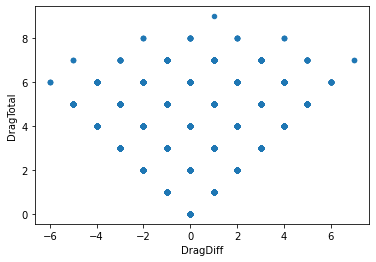

In [26]:
ax1 = final.plot.scatter(x='DragDiff', y='DragTotal')

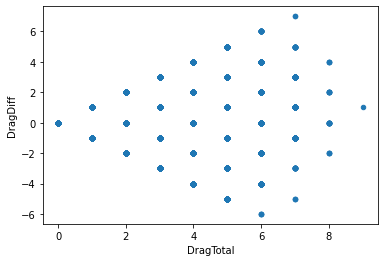

In [28]:
ax1 = final.plot.scatter(x='DragTotal', y='DragDiff')

<AxesSubplot:>

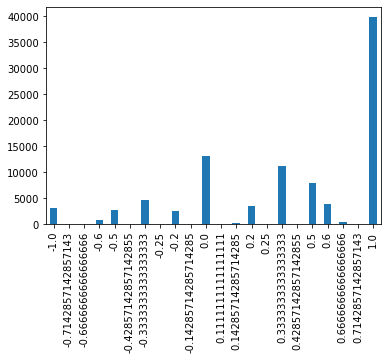

In [44]:
final.Ratio.value_counts().sort_index(ascending=True).plot(kind = 'bar')